In [1]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=e35ecd611dda0e8dce884a9d1339006971923e3ee3c64fbe6f2ec779c66ee6d9
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

 64% 19.0M/29.9M [00:00<00:00, 196MB/s]
100% 29.9M/29.9M [00:00<00:00, 171MB/s]


In [6]:
!unzip /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_dataset = pd.read_csv('/content/train.csv')

In [12]:
print(f'Número total de características: {train_dataset.shape[1]}')
print(f'Número total de muestras: {train_dataset.shape[0]}')

Número total de características: 21
Número total de muestras: 692500


In [19]:
len(train_dataset.columns)

21

In [13]:
num_columns_with_missing_values = train_dataset.isnull().sum()[train_dataset.isnull().sum() > 0].count()
print(f"Columnas con valores faltantes: {num_columns_with_missing_values}")

Columnas con valores faltantes: 11


In [10]:
train_dataset.isnull().sum()[train_dataset.isnull().sum() > 0].sort_values(ascending=False)

,0
FAMI_TIENEAUTOMOVIL,43623
FAMI_TIENELAVADORA,39773
FAMI_TIENECOMPUTADOR,38103
FAMI_ESTRATOVIVIENDA,32137
ESTU_HORASSEMANATRABAJA,30857
FAMI_TIENEINTERNET.1,26629
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONMADRE,23664
FAMI_EDUCACIONPADRE,23178
ESTU_PAGOMATRICULAPROPIO,6498


In [16]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


In [17]:
train_dataset.describe(include=[object,bool]).T

,count,unique,top,freq
ESTU_PRGM_ACADEMICO,692500,948,DERECHO,53244
ESTU_PRGM_DEPARTAMENTO,692500,31,BOGOTÁ,282159
ESTU_VALORMATRICULAUNIVERSIDAD,686213,8,Entre 1 millón y menos de 2.5 millones,204048
ESTU_HORASSEMANATRABAJA,661643,5,Más de 30 horas,249352
FAMI_ESTRATOVIVIENDA,660363,7,Estrato 2,232671
FAMI_TIENEINTERNET,665871,2,Si,592514
FAMI_EDUCACIONPADRE,669322,12,Secundaria (Bachillerato) completa,128289
FAMI_TIENELAVADORA,652727,2,Si,563390
FAMI_TIENEAUTOMOVIL,648877,2,No,412606
ESTU_PRIVADO_LIBERTAD,692500,2,N,692466


In [20]:
train_dataset['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


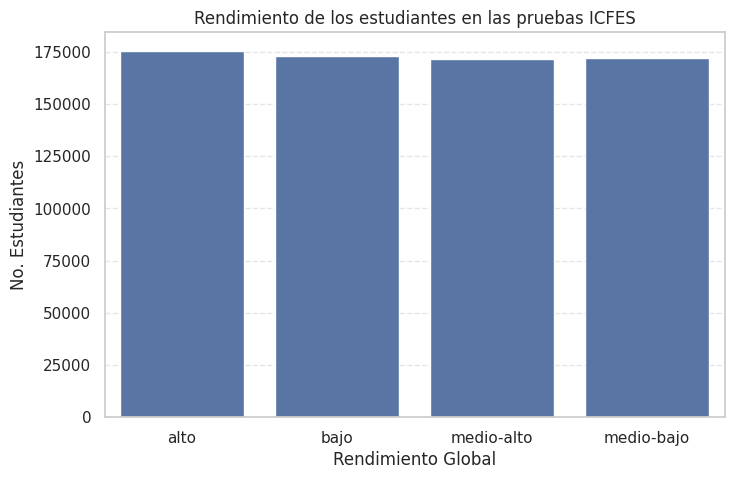

In [21]:
count_df = train_dataset.groupby(['RENDIMIENTO_GLOBAL']).size().reset_index(name='count')

plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

sns.barplot(data=count_df,
            x='RENDIMIENTO_GLOBAL',
            y='count'
            )

plt.xlabel('Rendimiento Global')
plt.ylabel('No. Estudiantes')
plt.title('Rendimiento de los estudiantes en las pruebas ICFES')
plt.grid(linestyle='--', alpha=0.5, axis='y')

# Mostrar el gráfico
plt.show()